## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   9.226507   926.886258  0.956704  6.413381  1.576002
1  86.965467  1229.500801  0.589625  2.360979  1.506875
2  77.835428   799.947799  0.093946  1.690198  0.598303
3   3.347492   623.248200  0.247234  2.077619  1.565735
4  53.922732  1453.657051  0.829861  7.148446  1.574835


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9107590	total: 57.2ms	remaining: 57.2s
1:	learn: 0.9031946	total: 57.7ms	remaining: 28.8s
2:	learn: 0.8938949	total: 58.2ms	remaining: 19.3s
3:	learn: 0.8856634	total: 58.7ms	remaining: 14.6s
4:	learn: 0.8774392	total: 59.3ms	remaining: 11.8s
5:	learn: 0.8673356	total: 59.7ms	remaining: 9.89s
6:	learn: 0.8578120	total: 60.2ms	remaining: 8.54s
7:	learn: 0.8491500	total: 60.9ms	remaining: 7.55s
8:	learn: 0.8407171	total: 61.5ms	remaining: 6.77s
9:	learn: 0.8323835	total: 62ms	remaining: 6.13s
10:	learn: 0.8237599	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8152522	total: 63ms	remaining: 5.18s
12:	learn: 0.8092993	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8022705	total: 64ms	remaining: 4.5s
14:	learn: 0.7936824	total: 64.4ms	remaining: 4.23s
15:	learn: 0.7858687	total: 64.8ms	remaining: 3.99s
16:	learn: 0.7771341	total: 65.3ms	remaining: 3.77s
17:	learn: 0.7698261	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7632136	total: 66.1ms	remaining: 3.41s

109:	learn: 0.3572539	total: 106ms	remaining: 856ms
110:	learn: 0.3540890	total: 106ms	remaining: 851ms
111:	learn: 0.3516694	total: 107ms	remaining: 845ms
112:	learn: 0.3494514	total: 107ms	remaining: 841ms
113:	learn: 0.3466511	total: 107ms	remaining: 835ms
114:	learn: 0.3446513	total: 108ms	remaining: 830ms
115:	learn: 0.3425003	total: 108ms	remaining: 826ms
116:	learn: 0.3402067	total: 109ms	remaining: 820ms
117:	learn: 0.3382365	total: 109ms	remaining: 816ms
118:	learn: 0.3360182	total: 109ms	remaining: 811ms
119:	learn: 0.3336755	total: 110ms	remaining: 805ms
120:	learn: 0.3317704	total: 110ms	remaining: 801ms
121:	learn: 0.3293961	total: 111ms	remaining: 796ms
122:	learn: 0.3274663	total: 111ms	remaining: 791ms
123:	learn: 0.3253530	total: 111ms	remaining: 786ms
124:	learn: 0.3236022	total: 112ms	remaining: 782ms
125:	learn: 0.3215582	total: 112ms	remaining: 777ms
126:	learn: 0.3195386	total: 112ms	remaining: 773ms
127:	learn: 0.3174626	total: 113ms	remaining: 769ms
128:	learn: 

296:	learn: 0.1541248	total: 185ms	remaining: 439ms
297:	learn: 0.1537044	total: 186ms	remaining: 438ms
298:	learn: 0.1532484	total: 186ms	remaining: 437ms
299:	learn: 0.1524714	total: 187ms	remaining: 435ms
300:	learn: 0.1522049	total: 187ms	remaining: 434ms
301:	learn: 0.1517701	total: 187ms	remaining: 433ms
302:	learn: 0.1513628	total: 188ms	remaining: 432ms
303:	learn: 0.1508989	total: 188ms	remaining: 430ms
304:	learn: 0.1506444	total: 188ms	remaining: 429ms
305:	learn: 0.1498989	total: 189ms	remaining: 428ms
306:	learn: 0.1491695	total: 189ms	remaining: 427ms
307:	learn: 0.1489142	total: 190ms	remaining: 426ms
308:	learn: 0.1481133	total: 190ms	remaining: 425ms
309:	learn: 0.1478685	total: 190ms	remaining: 424ms
310:	learn: 0.1476203	total: 191ms	remaining: 423ms
311:	learn: 0.1472422	total: 191ms	remaining: 422ms
312:	learn: 0.1466935	total: 192ms	remaining: 421ms
313:	learn: 0.1463192	total: 192ms	remaining: 420ms
314:	learn: 0.1455800	total: 192ms	remaining: 419ms
315:	learn: 

535:	learn: 0.0660891	total: 287ms	remaining: 248ms
536:	learn: 0.0658701	total: 287ms	remaining: 248ms
537:	learn: 0.0656605	total: 288ms	remaining: 247ms
538:	learn: 0.0654932	total: 288ms	remaining: 247ms
539:	learn: 0.0653919	total: 289ms	remaining: 246ms
540:	learn: 0.0651861	total: 289ms	remaining: 245ms
541:	learn: 0.0650861	total: 289ms	remaining: 244ms
542:	learn: 0.0649876	total: 290ms	remaining: 244ms
543:	learn: 0.0647564	total: 290ms	remaining: 243ms
544:	learn: 0.0645327	total: 291ms	remaining: 243ms
545:	learn: 0.0643344	total: 291ms	remaining: 242ms
546:	learn: 0.0641750	total: 292ms	remaining: 241ms
547:	learn: 0.0640796	total: 292ms	remaining: 241ms
548:	learn: 0.0639620	total: 292ms	remaining: 240ms
549:	learn: 0.0638463	total: 293ms	remaining: 240ms
550:	learn: 0.0637325	total: 293ms	remaining: 239ms
551:	learn: 0.0635307	total: 294ms	remaining: 238ms
552:	learn: 0.0633099	total: 294ms	remaining: 238ms
553:	learn: 0.0631128	total: 294ms	remaining: 237ms
554:	learn: 

721:	learn: 0.0390051	total: 366ms	remaining: 141ms
722:	learn: 0.0388584	total: 367ms	remaining: 141ms
723:	learn: 0.0387457	total: 368ms	remaining: 140ms
724:	learn: 0.0386021	total: 368ms	remaining: 140ms
725:	learn: 0.0384614	total: 369ms	remaining: 139ms
726:	learn: 0.0384203	total: 369ms	remaining: 139ms
727:	learn: 0.0382463	total: 369ms	remaining: 138ms
728:	learn: 0.0381100	total: 370ms	remaining: 137ms
729:	learn: 0.0379728	total: 370ms	remaining: 137ms
730:	learn: 0.0378276	total: 370ms	remaining: 136ms
731:	learn: 0.0376937	total: 371ms	remaining: 136ms
732:	learn: 0.0376139	total: 371ms	remaining: 135ms
733:	learn: 0.0374834	total: 372ms	remaining: 135ms
734:	learn: 0.0373558	total: 372ms	remaining: 134ms
735:	learn: 0.0372854	total: 372ms	remaining: 134ms
736:	learn: 0.0371547	total: 373ms	remaining: 133ms
737:	learn: 0.0370258	total: 373ms	remaining: 133ms
738:	learn: 0.0369031	total: 374ms	remaining: 132ms
739:	learn: 0.0368344	total: 374ms	remaining: 131ms
740:	learn: 

956:	learn: 0.0204911	total: 469ms	remaining: 21.1ms
957:	learn: 0.0204679	total: 470ms	remaining: 20.6ms
958:	learn: 0.0204139	total: 470ms	remaining: 20.1ms
959:	learn: 0.0203930	total: 470ms	remaining: 19.6ms
960:	learn: 0.0203430	total: 470ms	remaining: 19.1ms
961:	learn: 0.0202907	total: 471ms	remaining: 18.6ms
962:	learn: 0.0202569	total: 472ms	remaining: 18.1ms
963:	learn: 0.0202105	total: 472ms	remaining: 17.6ms
964:	learn: 0.0201616	total: 473ms	remaining: 17.1ms
965:	learn: 0.0201120	total: 473ms	remaining: 16.7ms
966:	learn: 0.0200641	total: 474ms	remaining: 16.2ms
967:	learn: 0.0200172	total: 474ms	remaining: 15.7ms
968:	learn: 0.0199686	total: 474ms	remaining: 15.2ms
969:	learn: 0.0199227	total: 475ms	remaining: 14.7ms
970:	learn: 0.0198728	total: 475ms	remaining: 14.2ms
971:	learn: 0.0198500	total: 475ms	remaining: 13.7ms
972:	learn: 0.0198043	total: 476ms	remaining: 13.2ms
973:	learn: 0.0197910	total: 476ms	remaining: 12.7ms
974:	learn: 0.0197779	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

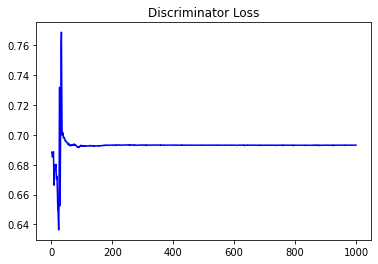

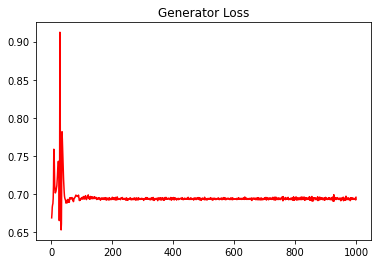

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3915793408920281


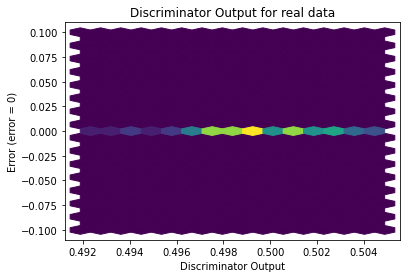

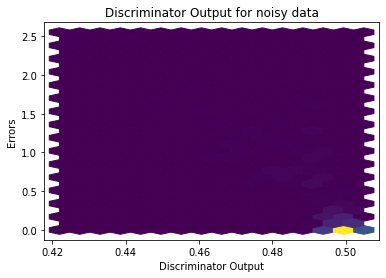

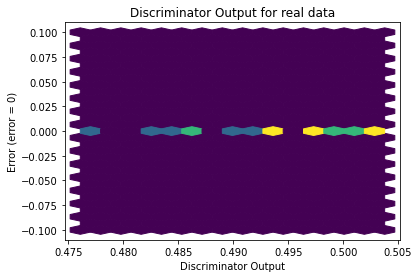

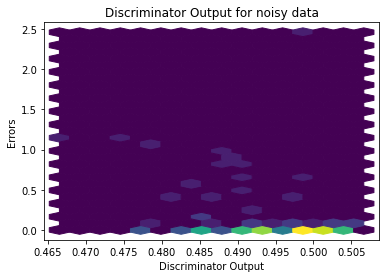

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


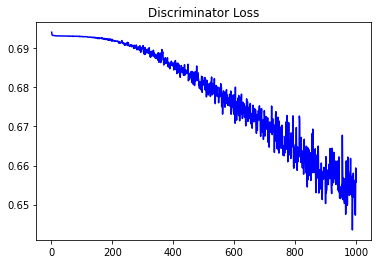

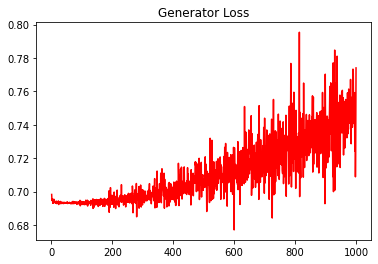

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.34287697650228854


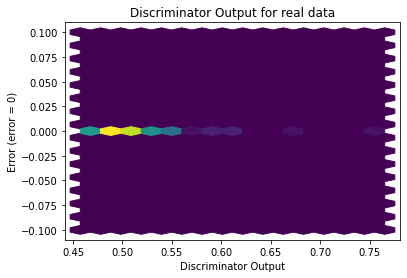

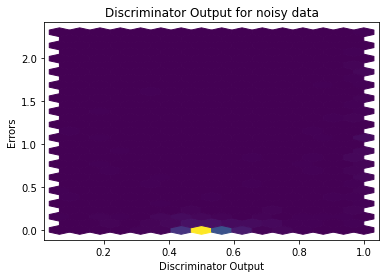

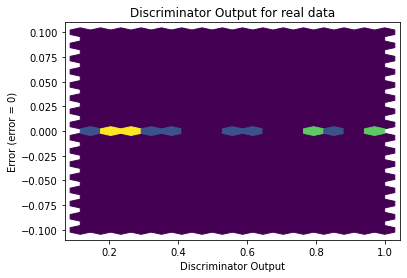

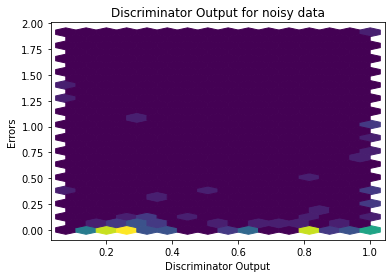

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
